In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data collection and description

In [2]:
df = pd.read_csv("C:\\Users\\chakri\\Downloads\\Company_Data (1).csv")


In [3]:
df1 = df.copy()

In [4]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

# Outlier Check

The data has 2 outlier instances

In [9]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


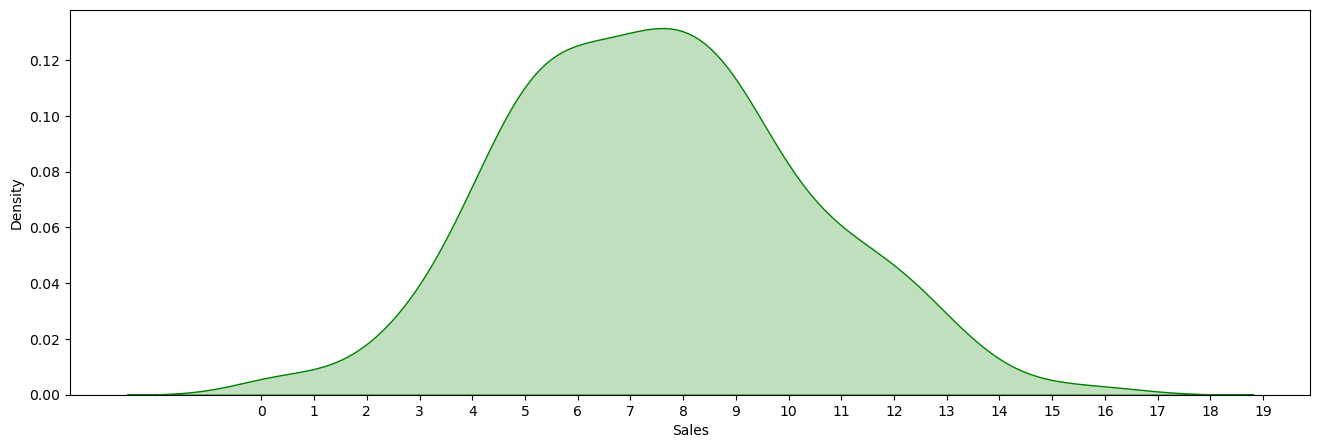

In [11]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()


The data is Skwed on the right

The data has negative Kurtosis

In [13]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

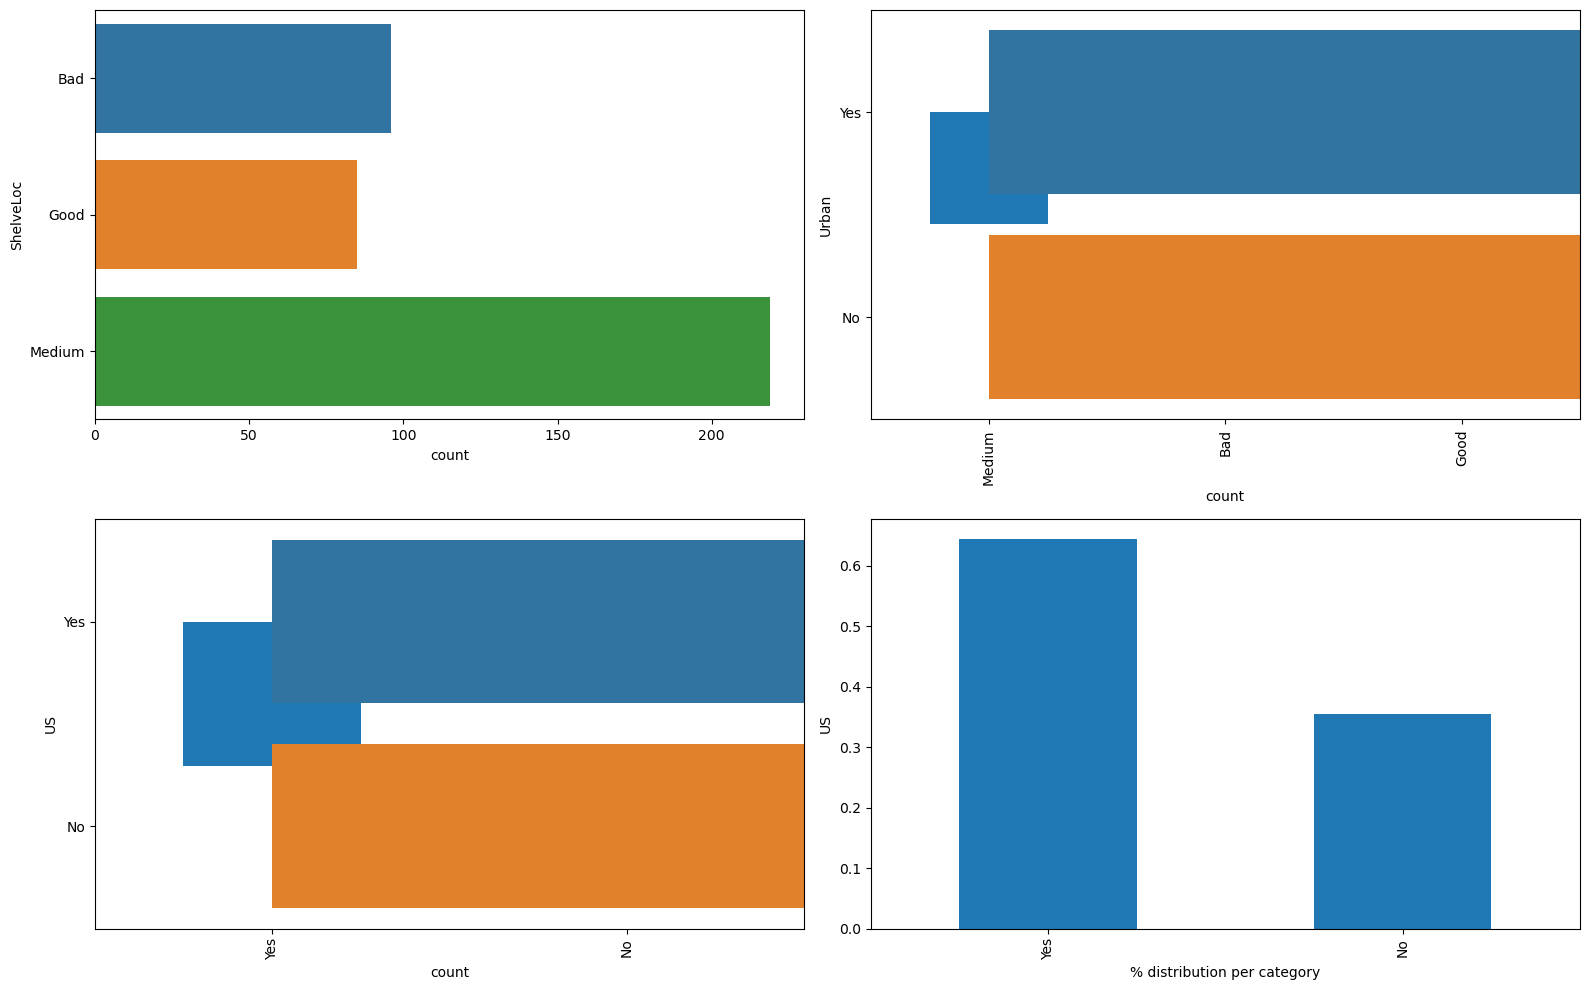

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [15]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

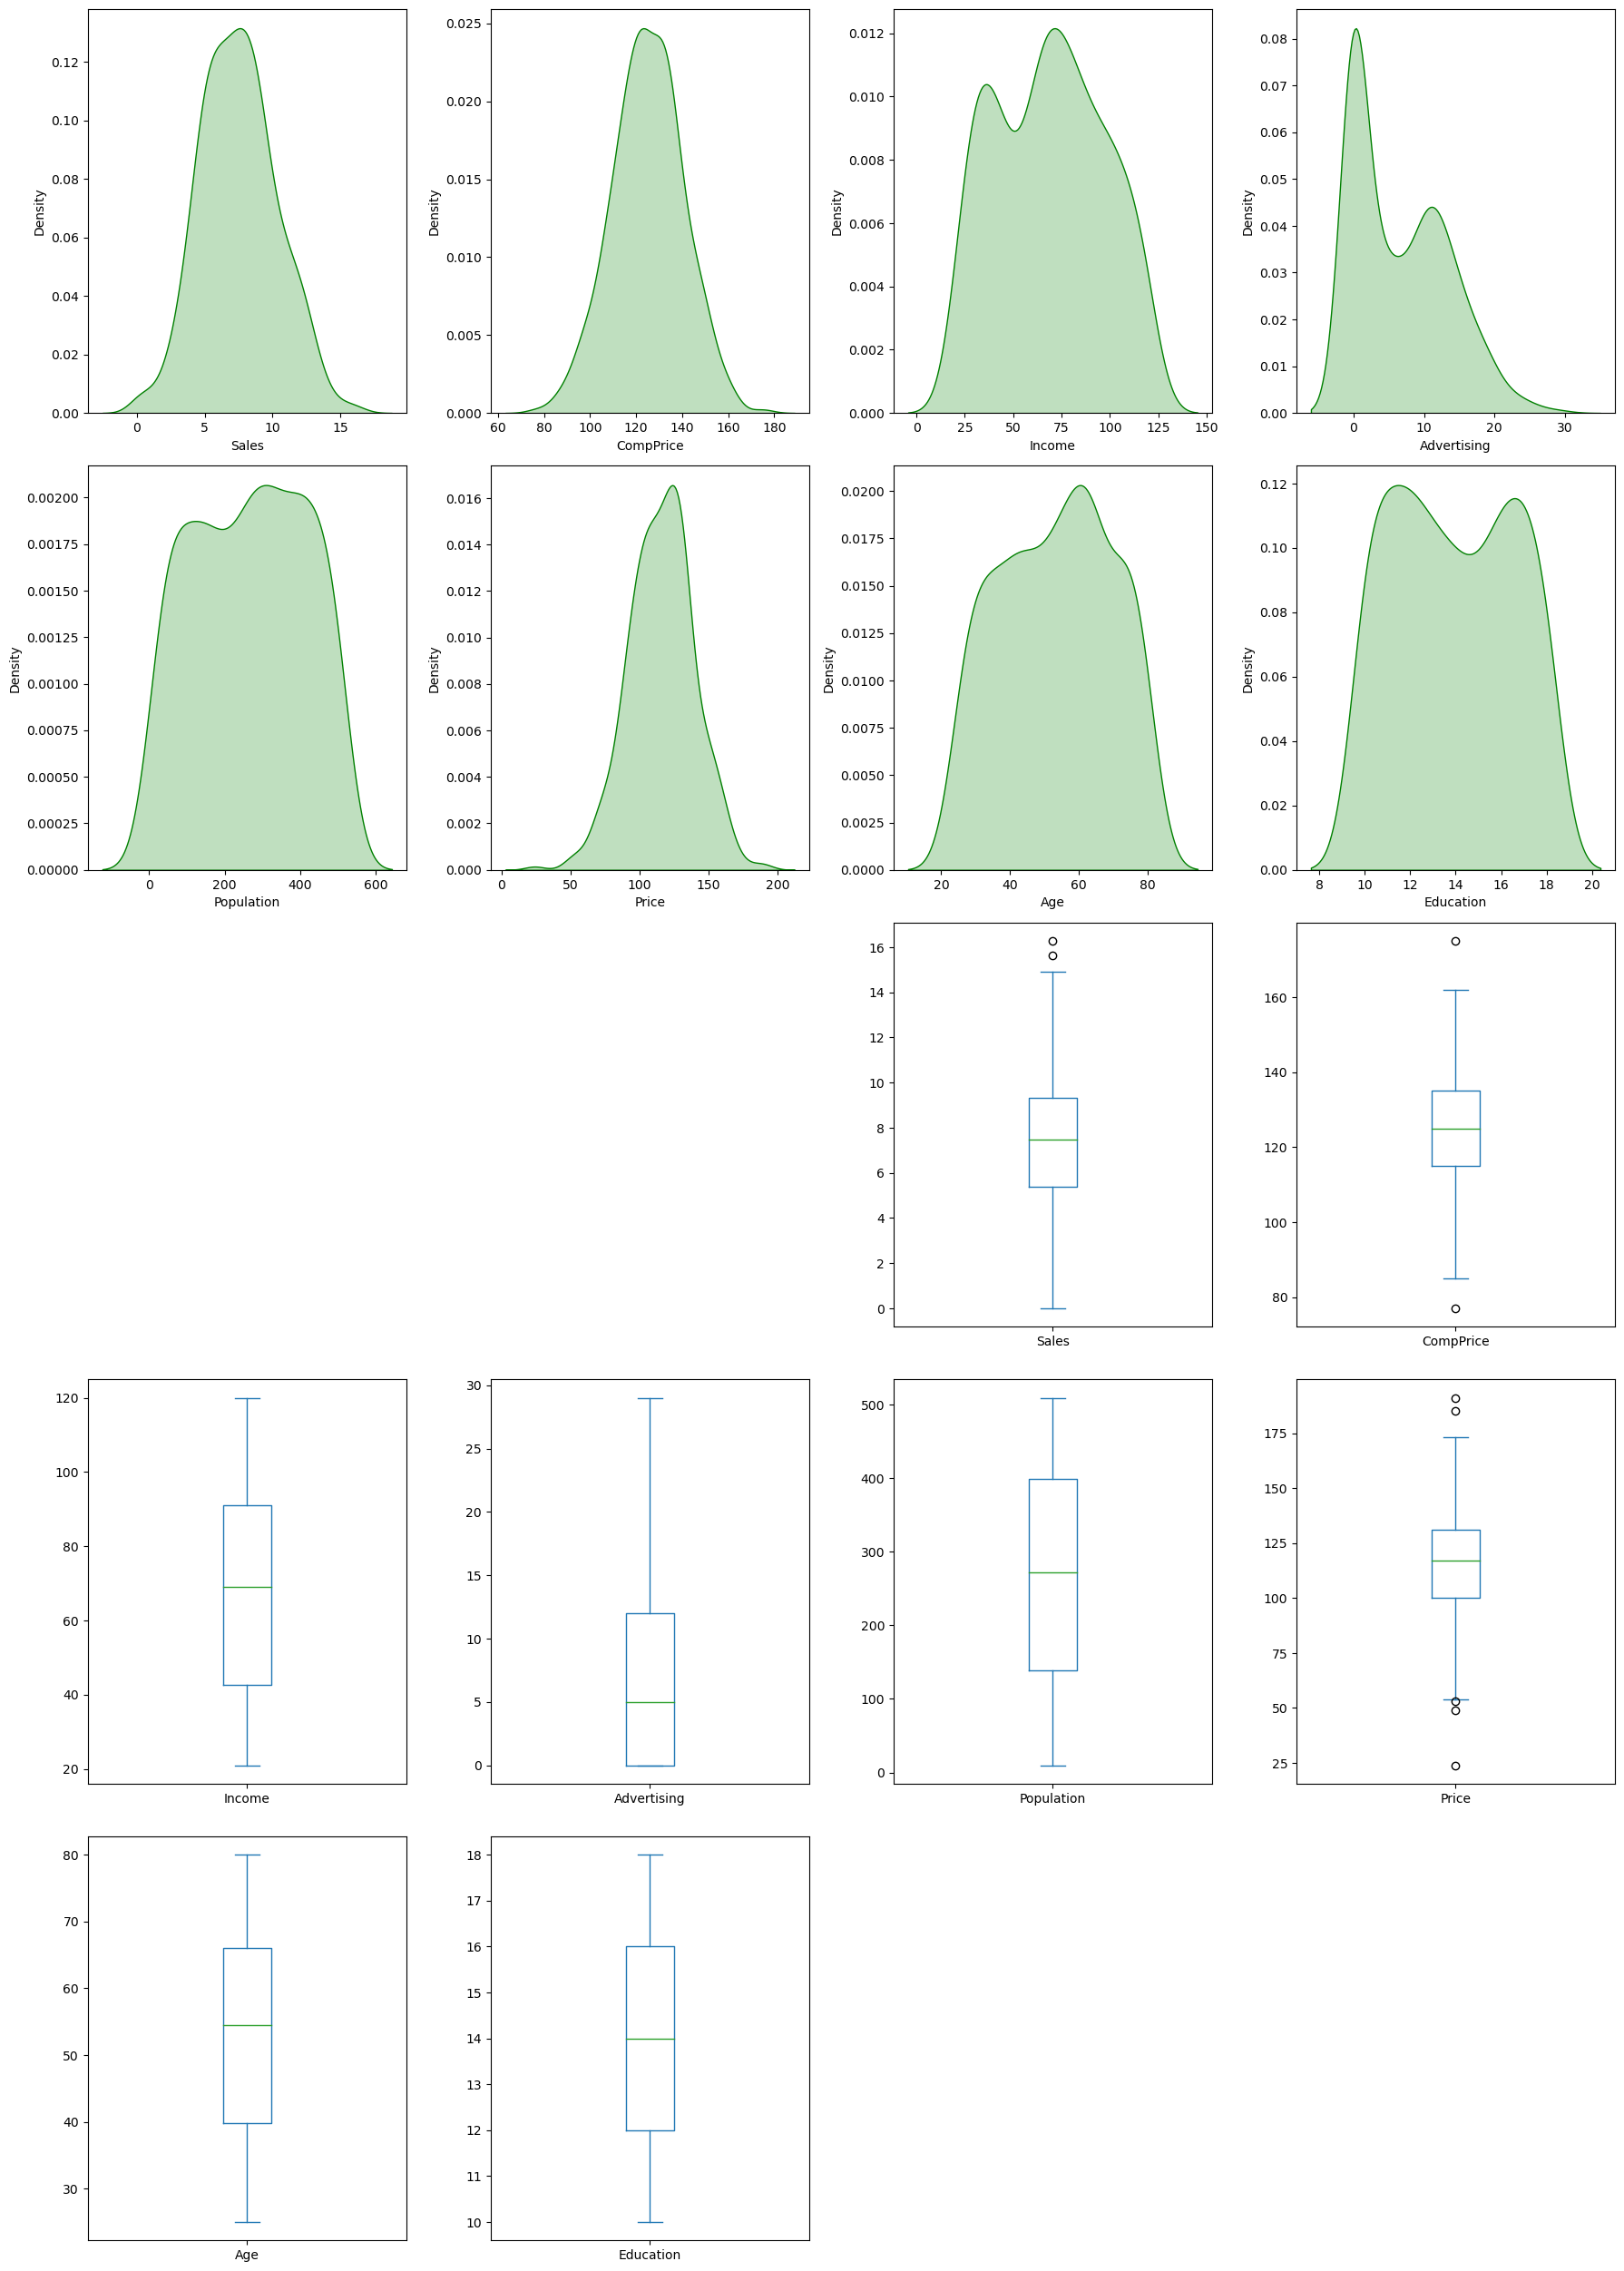

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [17]:
corr = df1.corr()

In [18]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [19]:
corr = df1.corr()

<Axes: >

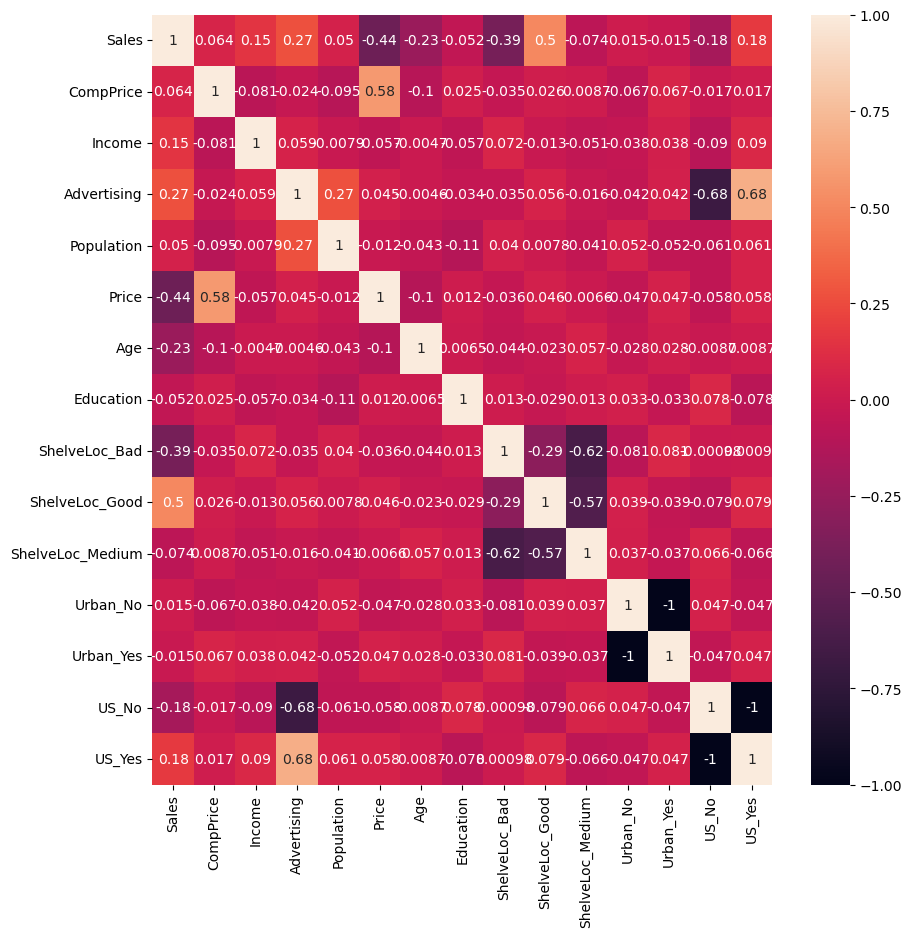

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Random Forest Model

Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [21]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [22]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [24]:
y_train.value_counts()

large    165
small    155
Name: sales, dtype: int64

In [25]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.778125

In [26]:
pred_train = model.predict(x_train)

In [27]:
accuracy_score(y_train,pred_train)

1.0

In [28]:
confusion_matrix(y_train,pred_train)

array([[165,   0],
       [  0, 155]], dtype=int64)

In [29]:
pred_test = model.predict(x_test)

In [30]:
accuracy_score(y_test,pred_test)

0.8375

In [31]:
confusion_matrix(y_test,pred_test)

array([[27,  7],
       [ 6, 40]], dtype=int64)

In [32]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [33]:
df_t

,Actual,Predicted
306,small,small
107,large,small
256,small,small
359,small,small
217,small,small
...,...,...
100,small,small
61,small,small
182,small,small
344,large,large


# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%
As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not

In [41]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [42]:
rf_small.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=10)

In [43]:
model.feature_importances_

array([0.11272585, 0.10108266, 0.09963628, 0.10887697, 0.22349417,
       0.11568569, 0.05892996, 0.04344287, 0.07241919, 0.01939291,
       0.01171428, 0.01164279, 0.00943685, 0.01151955])

In [44]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [45]:
fi

,feature,importance
4,Price,0.223494
5,Age,0.115686
0,CompPrice,0.112726
3,Population,0.108877
1,Income,0.101083
2,Advertising,0.099636
8,ShelveLoc_Good,0.072419
6,Education,0.058930
7,ShelveLoc_Bad,0.043443
9,ShelveLoc_Medium,0.019393


As seen in the above table Price is most important feature

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb

# Load the dataset
df = pd.read_csv("C:\\Users\\chakri\\Downloads\\Company_Data (1).csv")

In [8]:
# Explore the dataset
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
df.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb

In [2]:
pip install lightgbm


     ---------------------------------------- 1.3/1.3 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# EDA and Visualization

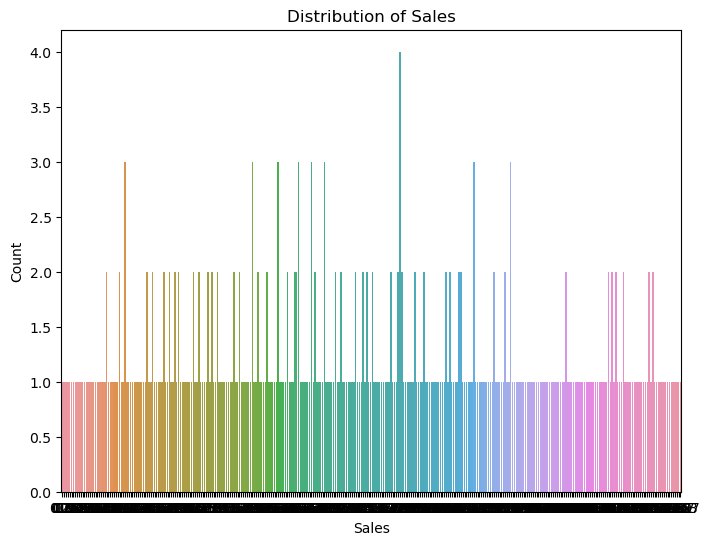

In [11]:
# Distribution of sales
plt.figure(figsize=(8, 6))
sns.countplot(x='Sales', data=df)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

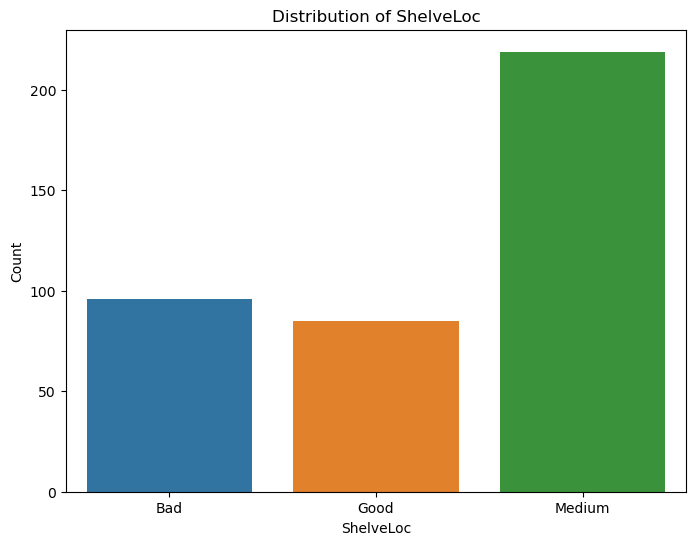

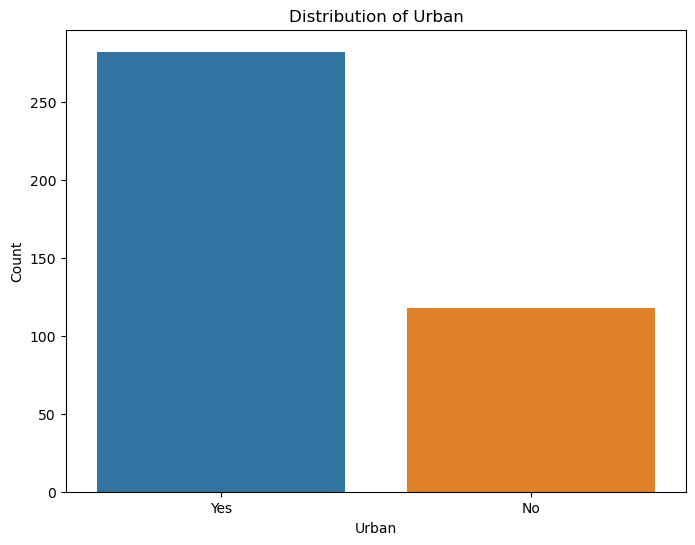

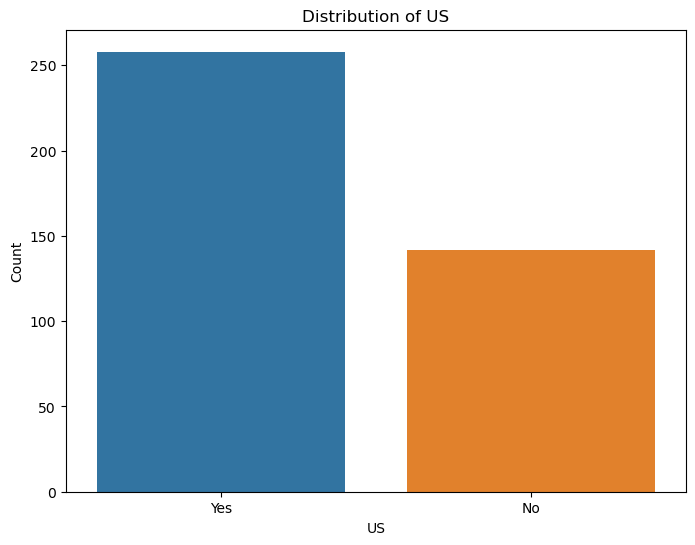

In [12]:
# Distribution of other categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

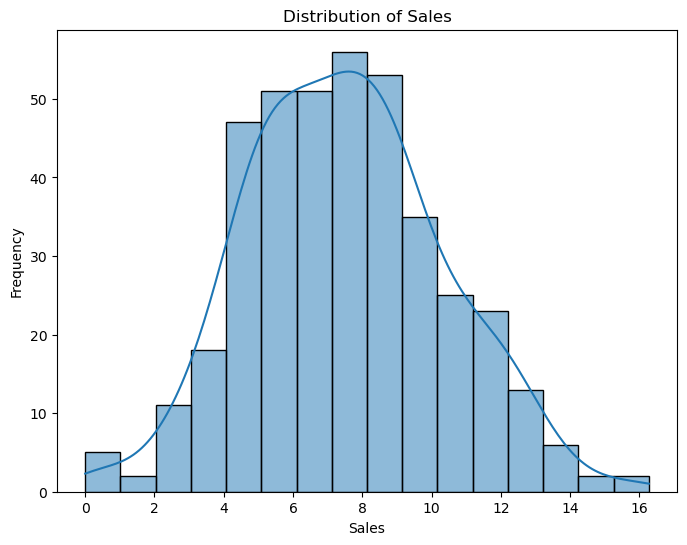

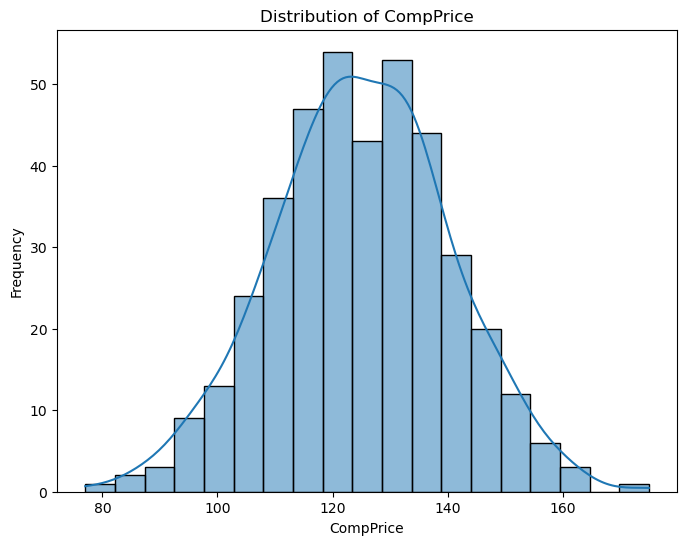

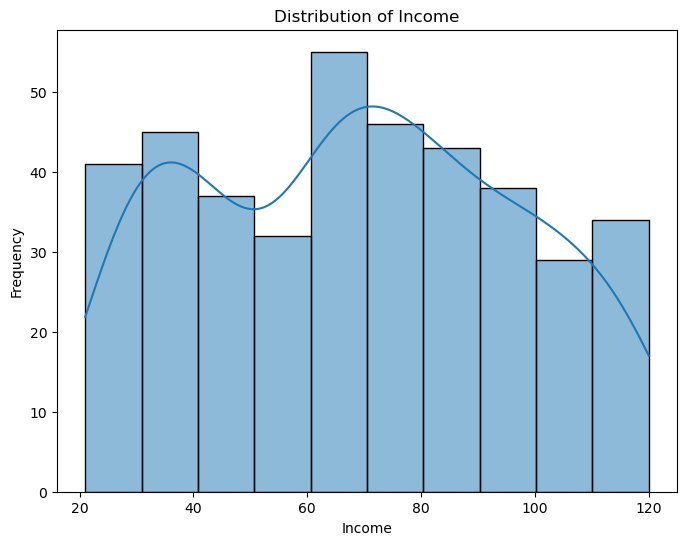

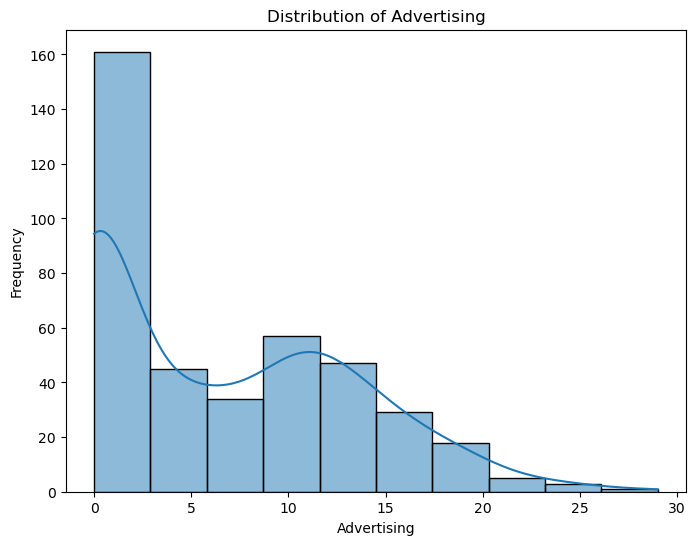

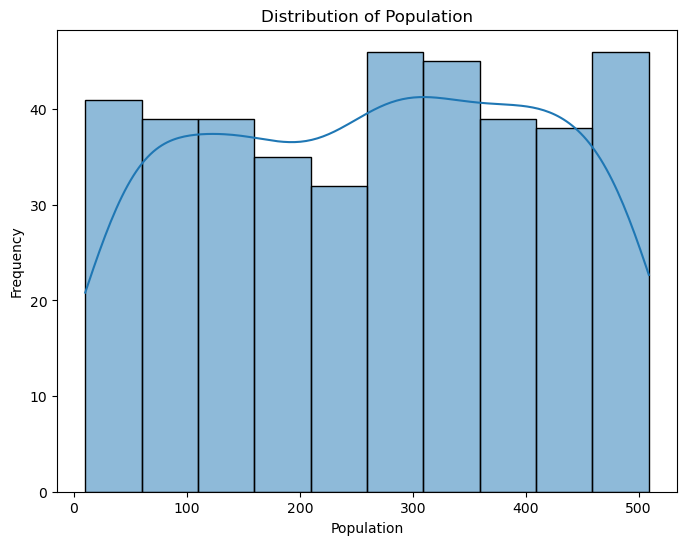

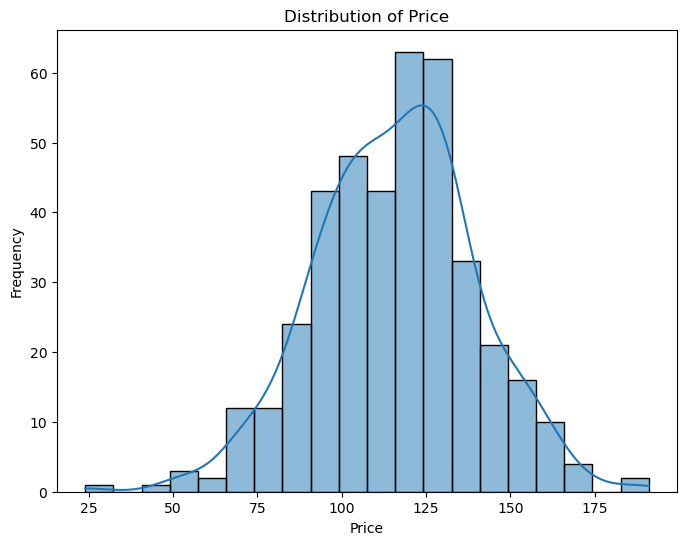

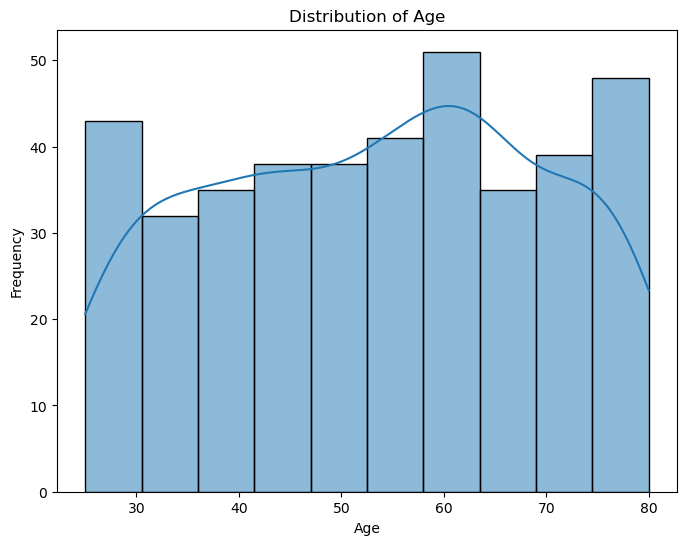

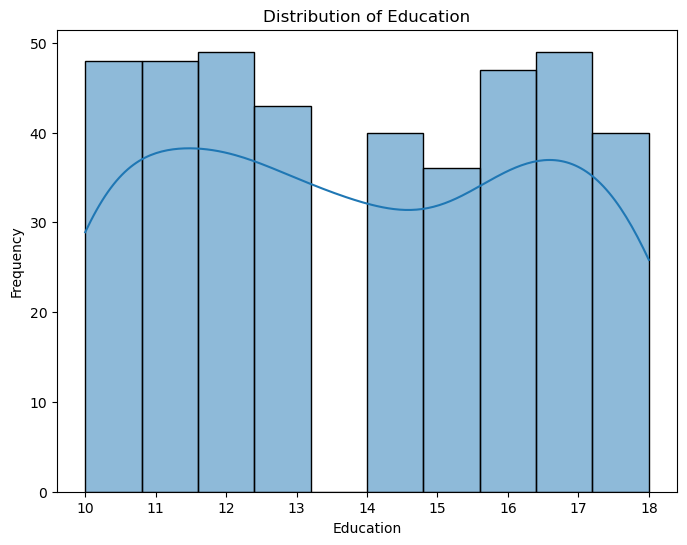

In [13]:
# Distribution of numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\chakri\AppData\Local\Temp\ipykernel_19564\4137570652.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


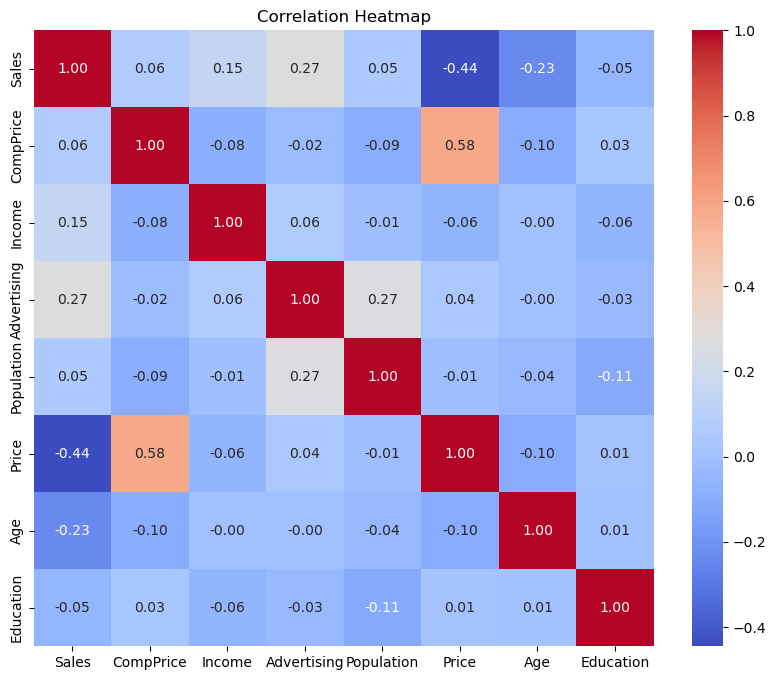

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [74]:
# Load the dataset
df = pd.read_csv("C:\\Users\\chakri\\Downloads\\Company_Data (1).csv")


In [75]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])



In [76]:
# Define features and target variable
X = df_encoded.drop(columns=['Sales'])
y = np.where(df['Sales'] > 7.49, 'Large', 'Small')  # Convert Sales to categorical variable



In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [78]:
# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=42)

In [79]:
# Make predictions on training set
y_pred_train = rf_classifier.predict(X_train)



In [80]:
# Calculate accuracy on training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on Training Set:", accuracy_train)


Accuracy on Training Set: 1.0


In [81]:

# Make predictions on test set
y_pred_test = rf_classifier.predict(X_test)



In [82]:
# Calculate accuracy on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)

Accuracy on Test Set: 0.825


In [107]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])


In [108]:

# Define features and target variable
X = df_encoded.drop(columns=['Sales'])
y = np.where(df['Sales'] > 7.49, 'Large', 'Small')  # Convert Sales to categorical variable


In [109]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:

# Label encoding for categorical variables
label_encoder = LabelEncoder()
X_train_encoded = X_train.apply(label_encoder.fit_transform)



In [111]:
# Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=42)
rf_classifier.fit(X_train_encoded, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.6375


In [112]:

# Bagging Model
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150, random_state=42)
bagging_classifier.fit(X_train_encoded, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)


Bagging Accuracy: 0.5125


In [114]:

# AdaBoost Model
adaboost_classifier = AdaBoostClassifier(n_estimators=150, random_state=42)
adaboost_classifier.fit(X_train_encoded, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)


AdaBoost Accuracy: 0.4875


In [96]:
# LGBM Model
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train_encoded, y_train)
y_pred_lgbm = lgbm_classifier.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LGBM Accuracy:", accuracy_lgbm)



[LightGBM] [Info] Number of positive: 164, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512500 -> initscore=0.050010
[LightGBM] [Info] Start training from score 0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g